In [1]:
import os

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

import project_path
from project_path import module_path, configuration_dir, data_dir, report_dir

basepath = "/media/storage/data/shorelines/"
metrics = pd.read_csv(basepath + "metrics.csv")

In [2]:
from utils import GluonConfigs
tf = GluonConfigs.load_data()

In [3]:
tf = tf.set_index('transect_id')
tf = tf.dropna(thresh=33)
print(f"Transects included in dataset: {tf.shape[0]}; timesteps: {tf.shape[1]}")
tf.head()

Transects included in dataset: 37111; timesteps: 33


,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
transect_id,,,,,,,,,,,,,,,,,,,,,
BOX_051_151_15,677.32043,695.66370,713.29486,682.1743,688.23425,672.13007,700.43286,693.43460,699.38560,687.97950,...,700.6640,712.41740,708.45123,740.33240,680.42510,758.35150,754.49695,763.04297,743.29680,779.41570
BOX_051_151_18,768.93800,769.23883,762.44300,755.8622,761.79663,760.51710,763.30505,761.81360,769.22100,765.47060,...,763.1057,759.72600,766.23150,770.77130,798.26830,797.99615,803.90950,797.90780,798.18830,803.68256
BOX_051_151_21,711.41626,684.20540,695.49817,701.6695,705.29990,703.61470,707.69403,692.90360,704.68280,704.99945,...,825.8698,820.51720,820.68680,842.18097,850.45460,775.96700,883.04240,867.92426,877.37415,874.50244
BOX_051_151_30,795.81573,820.63700,799.72380,799.8664,823.56260,822.07300,823.56800,823.73300,824.58400,824.33360,...,823.7820,823.15674,823.65790,821.31860,818.85803,817.31220,822.92970,818.73350,822.18480,818.73480
BOX_051_151_32,242.70204,238.05159,229.93718,244.0620,247.68105,257.49900,302.69217,301.27722,301.12033,316.40414,...,301.1231,313.63553,313.09814,312.90347,306.18658,294.18326,297.23654,302.88650,323.85840,304.36823


In [6]:
sites = pd.read_csv("/media/storage/data/shorelines/sites-gluonts-prepared.csv")
sites = sites.loc[sites['transect_id'].isin(tf.index)]

In [7]:
predictor_ids = [0, 1, 2, 3, 8, 9, 10, 11]
metrics_overview = metrics.groupby('predictor_id').mean().iloc[predictor_ids]
moi = metrics.loc[metrics['predictor_id'].isin(predictor_ids)]

def rank_metrics(df: pd.DataFrame, metrics: list) -> pd.DataFrame:
    for metric in metrics: 
        df[f"rank_{metric}"] = df[metric].rank().div(len(df))
    return df

target_metrics = ['MSE', 'MASE', 'MAPE', 'sMAPE', 'abs_error']

ranked_metrics = rank_metrics(
    df=metrics.loc[metrics['predictor_id'].isin(predictor_ids)],
    metrics=target_metrics
)

ranked_metrics.groupby('predictor_id').mean()

<ipython-input-7-b29ce6c65880>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"rank_{metric}"] = df[metric].rank().div(len(df))


,MSE,MASE,MAPE,sMAPE,RMSE,nRMSE,abs_error,MAE,abs_target_sum,abs_target_mean,...,Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9],rank_MSE,rank_MASE,rank_MAPE,rank_sMAPE,rank_abs_error
predictor_id,,,,,,,,,,,,,,,,,,,,,
0,2510.330038,inf,0.050717,0.032801,22.448325,inf,140.089027,20.012718,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.420918,0.559355,0.499222,0.499368,0.483786
1,2020.444868,1.353339,0.043551,0.027554,NaN,NaN,117.394005,NaN,5148.241266,735.463038,...,0.683298,99.983744,0.770041,75.421455,0.856050,0.397918,0.450629,0.474647,0.475097,0.459525
2,2055.496285,1.385399,0.042207,0.028659,NaN,NaN,121.202079,NaN,5148.241266,735.463038,...,0.687505,104.533406,0.774691,79.540374,0.860334,0.403520,0.459119,0.480606,0.481089,0.465880
3,1831.622570,inf,0.046776,0.031253,20.619414,inf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.433768,0.581919,0.502303,0.502337,NaN
8,1799.748659,1.672542,0.057254,0.030135,NaN,NaN,133.601150,NaN,5148.241266,735.463038,...,0.819842,114.266514,0.871374,88.319449,0.921571,0.493453,0.570724,0.565815,0.564105,0.555543
9,2065.801308,1.426255,0.044778,0.028827,NaN,NaN,124.575204,NaN,5148.241266,735.463038,...,0.725545,116.092330,0.805980,96.552815,0.881995,0.414796,0.454954,0.475546,0.475664,0.459427
10,2086.615367,1.589848,0.046457,0.030267,NaN,NaN,133.048792,NaN,5148.241266,735.463038,...,0.788368,120.227068,0.841672,98.525836,0.891418,0.452094,0.521025,0.524504,0.523291,0.512349
11,NaN,1.394226,0.041992,0.027220,NaN,NaN,117.117199,NaN,5148.241266,735.463038,...,0.668165,105.087896,0.719556,84.353680,0.863421,NaN,0.467829,0.479213,0.480933,0.466309


In [8]:
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl

plt.style.use(os.path.join(configuration_dir, 'PaperDoubleFig.mplstyle'))

colourWheel = [
    '#329932',
    '#ff6961',
    'b',
    '#6a3d9a',
    '#fb9a99',
    '#e31a1c',
    '#fdbf6f',
    '#ff7f00',
    '#cab2d6',
    '#6a3d9a',
    '#ffff99',
    '#b15928',
    '#67001f',
    '#b2182b',
    '#d6604d',
    '#f4a582',
    '#fddbc7',
    '#f7f7f7',
    '#d1e5f0',
    '#92c5de',
    '#4393c3',
    '#2166ac',
    '#053061'
]

dashesStyles = [
    [3,1],
    [1000,1],
    [2,1,10,1],
    [4, 1, 1, 1, 1,]
]

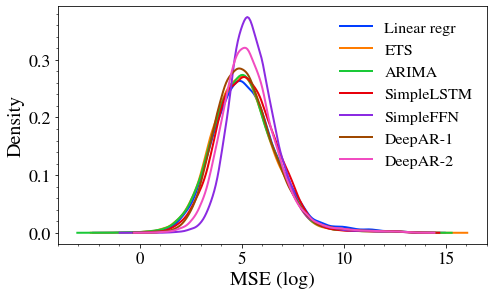

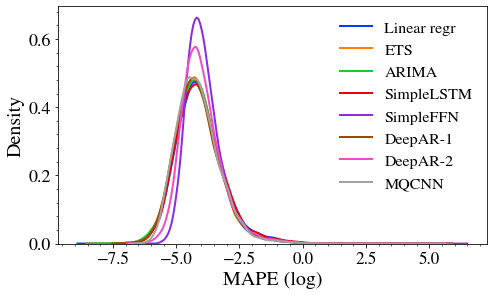

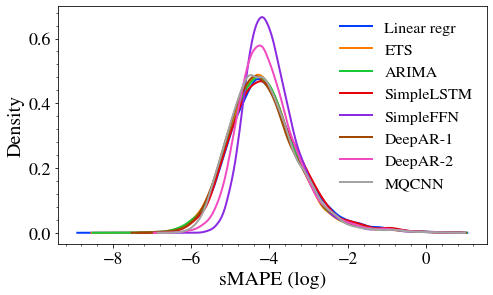

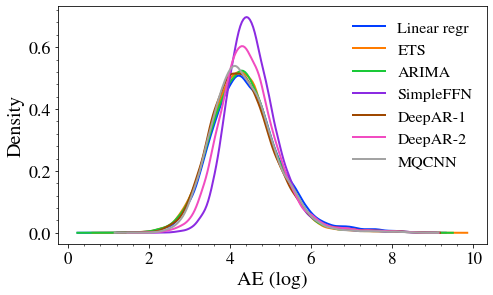

In [13]:
import seaborn as sns 

plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

# avoid false positive SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

legend_labels = {
    0: "Linear regr",
    1: "ETS",
    2: "ARIMA",
    3: "SimpleLSTM",
    8: "SimpleFFN",
    9: "DeepAR-1",
    10: "DeepAR-2",
    11: "MQCNN"
}

colour_palette = sns.color_palette("bright", len(predictor_ids))
colour_dict = dict(zip(predictor_ids, colour_palette))

def plot_log_distribution(ax, metric, df):
    for gr, frame in df.groupby('predictor_id'):
        frame[f"log_{metric}"] = np.log(frame[metric])
        sns.kdeplot(
            data=frame, 
            x=f"log_{metric}",
            ax=ax,
            label=f"{legend_labels[gr]}",
            color=colour_dict[gr]
        )
    ax.legend(loc='upper right', frameon=False)
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    return ax

#################################################################
# Mean Squared Error
#################################################################
fig, ax = plt.subplots()

ax = plot_log_distribution(
    ax=ax,
    metric='MSE',
    df=moi
)
ax.set_xlabel('MSE (log)')

plt.savefig(os.path.join(report_dir, 'images/kde-mse.pdf'), dpi=300)
plt.show()


# #################################################################
# # Mean Absolute Scaled Error 
# #################################################################
# fig, ax = plt.subplots()

# ax = plot_log_distribution(
#     ax=ax,
#     metric='MASE',
#     df=moi
# )
# ax.set_xlabel('MASE (log)')

# plt.savefig(os.path.join(report_dir, 'images/kde-mase.pdf'), dpi=300)
# plt.show()

#################################################################
# Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()
ax = plot_log_distribution(
    ax=ax,
    metric='MAPE',
    df=moi
)
ax.set_xlabel('MAPE (log)')

plt.savefig(os.path.join(report_dir, 'images/kde-mape.pdf'), dpi=300)
plt.show()


#################################################################
# Symmetric Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()

ax = plot_log_distribution(
    ax=ax,
    metric='sMAPE',
    df=moi
)
ax.set_xlabel('sMAPE (log)')

plt.savefig(os.path.join(report_dir, 'images/kde-sMAPE.pdf'), dpi=300)
plt.show()

#################################################################
# Absolute Error
#################################################################
fig, ax = plt.subplots()

ax = plot_log_distribution(
    ax=ax,
    metric='abs_error',
    df=moi
)

ax.set_xlabel('AE (log)')

plt.savefig(os.path.join(report_dir, 'images/kde-ae.pdf'), dpi=300)
plt.show()





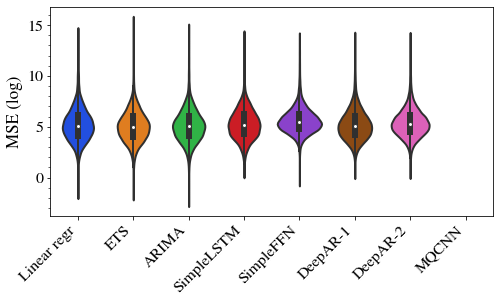

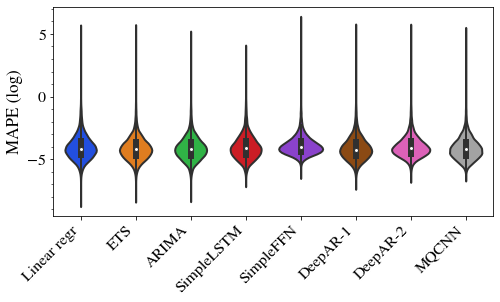

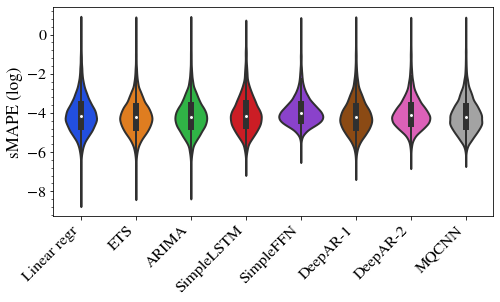

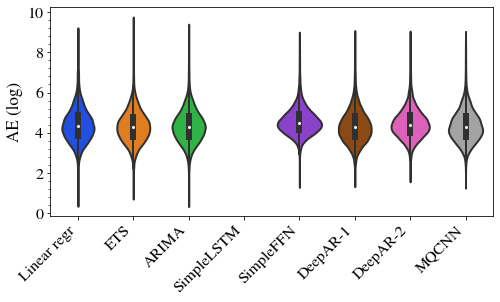

In [119]:

plt.style.use(os.path.join(configuration_dir, 'PaperSingleFig.mplstyle'))

def plot_log_violin(ax, metric, df):
    
    sns.violinplot(
        data=df,
        x="predictor_id",
        y=np.log(df[metric]),
        ax=ax,
        palette=colour_palette
    )
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.set_xticklabels(legend_labels.values(), rotation=45, ha="right")
    return ax


#################################################################
# Mean Squared Error 
#################################################################
fig, ax = plt.subplots()

ax = plot_log_violin(
    ax=ax,
    metric='MSE',
    df=moi
)

ax.set_xlabel('')
ax.set_ylabel('MSE (log)')

plt.savefig(os.path.join(report_dir, 'images/violin-mse.pdf'), dpi=300)
plt.show()

# #################################################################
# # Mean Absolute Scaled Error 
# #################################################################
# fig, ax = plt.subplots()

# ax = plot_log_violin(
#     ax=ax,
#     metric='MASE',
#     df=moi
# )

# ax.set_xlabel('')
# ax.set_ylabel('Mean Average Scaled Error')

# plt.savefig(os.path.join(report_dir, 'images/violin-mase.pdf'), dpi=300)
# plt.show()

#################################################################
# Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()

ax = plot_log_violin(
    ax=ax,
    metric='MAPE',
    df=moi
)

ax.set_xlabel('')
ax.set_ylabel('MAPE (log)')

plt.savefig(os.path.join(report_dir, 'images/violin-mape.pdf'), dpi=300)
plt.show()

#################################################################
# Symmetric Mean Absolute Percentage Error 
#################################################################
fig, ax = plt.subplots()

ax = plot_log_violin(
    ax=ax,
    metric='sMAPE',
    df=moi
)

ax.set_xlabel('')
ax.set_ylabel('sMAPE (log)')

plt.savefig(os.path.join(report_dir, 'images/violin-smape.pdf'), dpi=300)
plt.show()


#################################################################
# Absolute Error 
#################################################################
fig, ax = plt.subplots()

ax = plot_log_violin(
    ax=ax,
    metric='abs_error',
    df=moi
)

ax.set_xlabel('')
ax.set_ylabel('AE (log)')

plt.savefig(os.path.join(report_dir, 'images/violin-ae.pdf'), dpi=300)
plt.show()


In [41]:
list(ax.get_xticklabels())

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '8'),
 Text(5, 0, '9'),
 Text(6, 0, '10'),
 Text(7, 0, '11')]

In [31]:
metrics['predictor'].unique()

array(['linregress', 'ets', 'arima', 'SimpleLSTM',
       'SimpleFeedForwardEstimator', 'DeepAREstimator', 'MQCNNEstimator'],
      dtype=object)

In [53]:
s = metrics.loc[metrics['predictor_id']==2]['abs_error']/33
s.mean()


3.6727902837230575

In [54]:
metrics.loc[metrics['predictor_id']==0]['MAPE'].mean()

0.05071663418095143

In [32]:
metrics_overview = metrics.groupby('predictor_id').mean().iloc[[0, 1, 2, 3, 8, 9, 10, 11]]
metrics_overview

,MSE,MASE,MAPE,sMAPE,RMSE,nRMSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,...,Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9],rank_sMAPE,rank_MAPE,rank_MASE
predictor_id,,,,,,,,,,,,,,,,,,,,,
0,2510.330038,inf,0.050717,0.032801,22.448325,inf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234118.447657,234695.155183,265747.412681
1,2020.444868,1.353339,0.043551,0.027554,NaN,NaN,117.394005,5148.241266,735.463038,13.435316,...,0.593759,113.349685,0.683298,99.983744,0.770041,75.421455,0.856050,220678.096090,221097.906631,210065.843146
2,2055.496285,1.385399,0.042207,0.028659,NaN,NaN,121.202079,5148.241266,735.463038,13.435316,...,0.594429,117.681699,0.687505,104.533406,0.774691,79.540374,0.860334,223964.875064,224365.366145,214357.410498
3,1831.622570,inf,0.046776,0.031253,20.619414,inf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235363.075741,236093.607951,275871.161456
8,1799.748659,1.672542,0.057254,0.030135,NaN,NaN,133.601150,5148.241266,735.463038,13.435316,...,0.757927,128.070332,0.819842,114.266514,0.871374,88.319449,0.921571,262822.674948,264590.822802,269264.341058
9,2065.801308,1.426255,0.044778,0.028827,NaN,NaN,124.575204,5148.241266,735.463038,13.435316,...,0.632700,124.694206,0.725545,116.092330,0.805980,96.552815,0.881995,221367.645765,221931.504972,212973.888793
10,2086.615367,1.589848,0.046457,0.030267,NaN,NaN,133.048792,5148.241266,735.463038,13.435316,...,0.729033,131.115762,0.788368,120.227068,0.841672,98.525836,0.891418,243588.384468,244954.581607,245328.796219
11,NaN,1.394226,0.041992,0.027220,NaN,NaN,117.117199,5148.241266,735.463038,13.435316,...,0.484192,112.150763,0.668165,105.087896,0.719556,84.353680,0.863421,223421.347013,223185.772682,218596.235968


In [7]:
results = []
for group, frame in metrics.groupby('predictor_id'):
    tmp = frame.sort_values(['MAPE'])
    if group != 3: # exclude lstm dataset 
        results.append(tmp.nlargest(1000, 'MAPE')['item_id'].to_list())

worst_in_all = list(set.intersection(*map(set, results)))

In [47]:
worst_transects = []
for frame in results:
    for transect in frame:
        if transect not in worst_transects:
            worst_transects.append(transect)
            
worst_sites = sites.loc[sites['transect_id'].isin(worst_transects)]

In [54]:
import folium 

start_coords = worst_sites.iloc[0][['Intersect_lat', 'Intersect_lon']].values

count = 0
m = folium.Map(location=start_coords, zoom_start=4)
for row in worst_sites.iterrows():
    count+=1
    folium.CircleMarker(
        location=[row[1]['Intersect_lat'], row[1]['Intersect_lon']],
    ).add_to(m)
print(f"Added {count} to map")

Added 2307 to map


In [55]:
m

In [57]:
for gr, frame in metrics.loc[metrics['item_id'].isin(worst_transects)].groupby('predictor_id'):
    print(f"Group {gr}: {frame['MAPE'].mean()}")

Group 0: 0.5055931720567017
Group 1: 0.41861851003312905
Group 2: 0.39119871998707223
Group 4: 0.5920884460708674
Group 5: 0.43611255154776646
Group 6: 0.4390010469544837
Group 7: 0.35791272694743087
Group 8: 0.5957518524604541
Group 9: 0.43752864778982364
Group 10: 0.44070140566245974
Group 11: 0.3901959134071512
Group 12: 1.3589695119738003
Group 13: 0.6914438695691123
Group 14: 0.6521408527310819
Group 15: 0.5496235588495543


In [29]:
worst_log = worst.apply(lambda x: np.log(x), axis=1)
worst_log_norm = worst_log.apply(lambda x: x/x.max(), axis=1)

In [18]:
worst = tf.loc[tf.index.isin(idx)]

normalized = worst.apply(lambda x: x/x.max(), axis=1)

transect_id
BOX_056_007_16       [Line2D(_line0)]
BOX_056_007_26       [Line2D(_line1)]
BOX_056_007_27       [Line2D(_line2)]
BOX_056_007_3        [Line2D(_line3)]
BOX_056_012_2        [Line2D(_line4)]
                          ...        
BOX_183_525_342    [Line2D(_line233)]
BOX_183_526_70     [Line2D(_line234)]
BOX_183_540_215    [Line2D(_line235)]
BOX_183_570_44     [Line2D(_line236)]
BOX_184_023_86     [Line2D(_line237)]
Length: 238, dtype: object

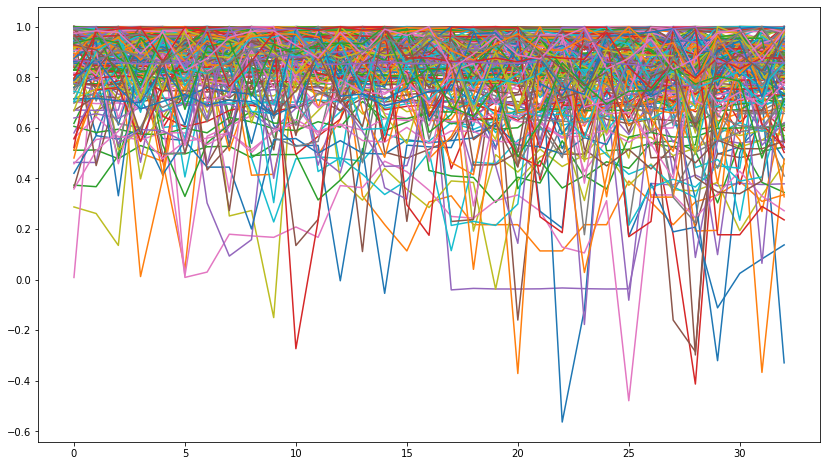

In [30]:
fig, ax = plt.subplots(1,1, figsize=(14, 8))
worst_log_norm.apply(lambda x: plt.plot(x.values), axis=1)

In [ ]:
import folium 

target = 'dbscan_cluster'

random_choice = np.random.choice(sites[target].unique(), size=1000)
sample = sites.loc[sites[target].isin(random_choice)]
start_coords = sample.iloc[0][['Intersect_lat', 'Intersect_lon']].values

m = folium.Map(location=start_coords, zoom_start=4)
for gr, frame in sample.groupby(target):
    color=np.random.choice(folium_colors)
    fill_color=np.random.choice(folium_colors)
    for row in frame.iterrows():
        folium.CircleMarker(
            location=[row[1]['geometry'].y, row[1]['geometry'].x],
            color=color,
            fill_color=fill_color
        ).add_to(m)

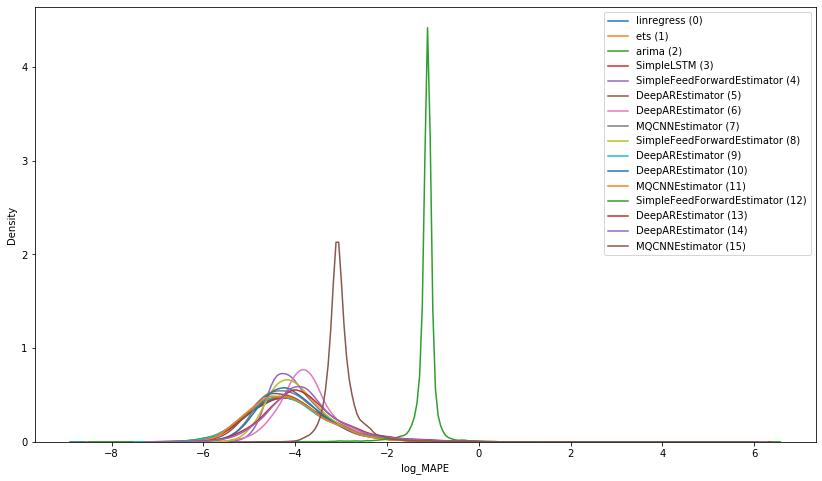

In [37]:
import seaborn as sns 

# avoid false positive SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

target = 'MAPE'
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
for group, frame in metrics.groupby('predictor_id'):
    frame[f'log_{target}'] = np.log(frame[target])
    sns.kdeplot(
        data=frame, 
        x=f'log_{target}', 
        ax=ax, 
        label=f"{metrics.loc[metrics['predictor_id']==group]['predictor'].unique()[0]} ({group})")
plt.legend()

In [24]:
metrics.groupby(['predictor_id', 'predictor']).mean().sort_values('sMAPE')

,,MSE,MASE,MAPE,sMAPE,RMSE,nRMSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
predictor_id,predictor,,,,,,,,,,,,,,,,,,,,,
11,MQCNNEstimator,NaN,1.394226,0.041992,0.027220,NaN,NaN,117.117199,5148.241266,735.463038,13.435316,...,117.117199,0.388987,117.256742,0.484192,112.150763,0.668165,105.087896,0.719556,84.353680,0.863421
1,ets,2020.444868,1.353339,0.043551,0.027554,NaN,NaN,117.394005,5148.241266,735.463038,13.435316,...,117.394005,0.505095,118.247988,0.593759,113.349685,0.683298,99.983744,0.770041,75.421455,0.856050
2,arima,2055.496285,1.385399,0.042207,0.028659,NaN,NaN,121.202079,5148.241266,735.463038,13.435316,...,121.202079,0.500706,122.301528,0.594429,117.681699,0.687505,104.533406,0.774691,79.540374,0.860334
9,DeepAREstimator,2065.801308,1.426255,0.044778,0.028827,NaN,NaN,124.575204,5148.241266,735.463038,13.435316,...,124.575204,0.532430,126.856284,0.632700,124.694206,0.725545,116.092330,0.805980,96.552815,0.881995
7,MQCNNEstimator,NaN,1.549768,0.041607,0.028971,NaN,NaN,126.060457,5148.241266,735.463038,13.435316,...,126.060457,0.294125,124.473651,0.430234,128.375945,0.479076,115.411663,0.595095,99.172388,0.725484
5,DeepAREstimator,2105.190984,1.504324,0.045238,0.029471,NaN,NaN,128.774994,5148.241266,735.463038,13.435316,...,128.774994,0.386955,129.663319,0.497916,125.664835,0.632288,116.589559,0.757388,97.397093,0.864176
8,SimpleFeedForwardEstimator,1799.748659,1.672542,0.057254,0.030135,NaN,NaN,133.601150,5148.241266,735.463038,13.435316,...,133.601150,0.687032,133.643434,0.757927,128.070332,0.819842,114.266514,0.871374,88.319449,0.921571
10,DeepAREstimator,2086.615367,1.589848,0.046457,0.030267,NaN,NaN,133.048792,5148.241266,735.463038,13.435316,...,133.048792,0.663777,134.563218,0.729033,131.115762,0.788368,120.227068,0.841672,98.525836,0.891418
4,SimpleFeedForwardEstimator,1788.376926,1.667796,0.057097,0.030286,NaN,NaN,133.135082,5148.241266,735.463038,13.435316,...,133.135082,0.418186,134.087480,0.485309,128.251971,0.569127,114.732168,0.674151,90.173608,0.806242


In [15]:
metrics.groupby('predictor_id').mean()

,MSE,MASE,MAPE,sMAPE,RMSE,nRMSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
predictor_id,,,,,,,,,,,,,,,,,,,,,
0,2510.330038,inf,0.050717,0.032801,22.448325,inf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.444868,1.353339,0.043551,0.027554,NaN,NaN,117.394005,5148.241266,735.463038,13.435316,...,117.394005,0.505095,118.247988,0.593759,113.349685,0.683298,99.983744,0.770041,75.421455,0.856050
2,2055.496285,1.385399,0.042207,0.028659,NaN,NaN,121.202079,5148.241266,735.463038,13.435316,...,121.202079,0.500706,122.301528,0.594429,117.681699,0.687505,104.533406,0.774691,79.540374,0.860334
3,1831.622570,inf,0.046776,0.031253,20.619414,inf,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1788.376926,1.667796,0.057097,0.030286,NaN,NaN,133.135082,5148.241266,735.463038,13.435316,...,133.135082,0.418186,134.087480,0.485309,128.251971,0.569127,114.732168,0.674151,90.173608,0.806242
5,2105.190984,1.504324,0.045238,0.029471,NaN,NaN,128.774994,5148.241266,735.463038,13.435316,...,128.774994,0.386955,129.663319,0.497916,125.664835,0.632288,116.589559,0.757388,97.397093,0.864176
6,2371.580883,2.164289,0.051346,0.035663,NaN,NaN,165.483276,5148.241266,735.463038,13.435316,...,165.483276,0.203486,170.462899,0.254668,165.556243,0.334410,153.517358,0.438900,124.436859,0.633759
7,NaN,1.549768,0.041607,0.028971,NaN,NaN,126.060457,5148.241266,735.463038,13.435316,...,126.060457,0.294125,124.473651,0.430234,128.375945,0.479076,115.411663,0.595095,99.172388,0.725484
8,1799.748659,1.672542,0.057254,0.030135,NaN,NaN,133.601150,5148.241266,735.463038,13.435316,...,133.601150,0.687032,133.643434,0.757927,128.070332,0.819842,114.266514,0.871374,88.319449,0.921571


In [ ]:
targ = 'sMAPE'
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
for fcst in [sff, deepar_1, deepar_2, mqcnn]:
    fcst[f'log_{targ}'] = np.log(fcst[targ])
    sns.kdeplot(data=fcst, x=f'{targ}', ax=ax[0])
    sns.kdeplot(data=fcst, x=f'log_{targ}', ax=ax[1])

In [49]:

get_predictor = lambda x, target : x.loc[x['predictor_id']==target]

def update_predictors(dl_frame):
    sff = get_predictor(dl_frame, 1)
    deepar_1 = get_predictor(dl_frame, 2)
    deepar_2 = get_predictor(dl_frame, 3)
    mqcnn = get_predictor(dl_frame, 4)
    return sff, deepar_1, deepar_2, mqcnn

sff, deepar_1, deepar_2, mqcnn = update_predictors(dl_3)

16

<ipython-input-26-9c8b66cbbba8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcst[f'log_{targ}'] = np.log(fcst[targ])
<ipython-input-26-9c8b66cbbba8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcst[f'log_{targ}'] = np.log(fcst[targ])
<ipython-input-26-9c8b66cbbba8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

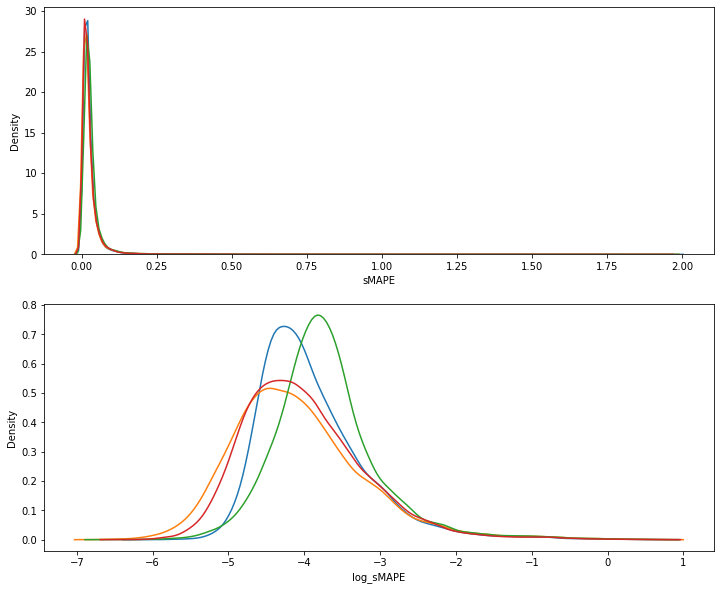

In [26]:
import geopandas as gpd
from shapely.geometry import Point

def make_geodataframe(df: pd.DataFrame) -> gpd.GeoDataFrame:
  crs = {"init": "epsg:4326"}
  return gpd.GeoDataFrame(df, crs=crs, geometry=df['geometry'])

def plot_spatial_distribution(gdf: gpd.GeoDataFrame) -> None:
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    fig, ax = plt.subplots(figsize=(12, 12))
    
    world.plot(ax=ax, alpha=.4)
    gdf.plot(markersize=2, ax=ax, label=f"Transects (n={len(gdf)})")
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Transects included in study')
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
geosites = make_geodataframe(sites)
plot_spatial_distribution(geosites)
plot_spatial_distribution(make_geodataframe(geosites.groupby('coastline_idint').first()))


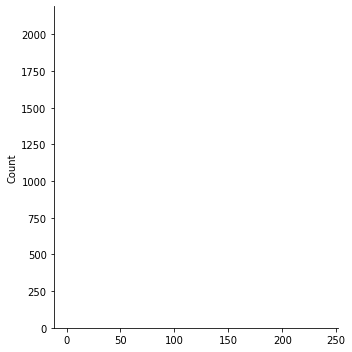

In [7]:
import seaborn as sns

sns.displot(lr['MAPE'].values)

In [ ]:
def plot_distribution(values, ax=None):
    ax = ax or plt.gca()
    line, = ax.hist(values)
    return line

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_distribution(lr['MAPE'], ax=ax[0])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
tf.apply(lambda x: ax.plot(x.values), axis=1)

In [ ]:
from scipy import stats

ets = ets_arima.loc[ets_arima['predictor']=='ets']
arima = ets_arima.loc[ets_arima['predictor']=='arima']

get_predictor = lambda x, target : x.loc[x['predictor_id']==target]

def update_predictors(dl_frame):
    sff = get_predictor(dl_frame, 1)
    deepar_1 = get_predictor(dl_frame, 2)
    deepar_2 = get_predictor(dl_frame, 3)
    mqcnn = get_predictor(dl_frame, 4)
    return sff, deepar_1, deepar_2, mqcnn

sff, deepar_1, deepar_2, mqcnn = update_predictors(dl_1)

evaluators = []
for frame in [ets, arima, sff, deepar_1, deepar_2, mqcnn]:
    tmp = frame.dropna(axis=1).select_dtypes(include=[np.float])
    reference = mqcnn.dropna(axis=1).select_dtypes(include=[np.float])
    tmp = tmp[reference.columns]
    evaluators.append(tmp.median())
    
res = stats.friedmanchisquare(*evaluators)
res

In [ ]:
from scipy import stats

ets = ets_arima.loc[ets_arima['predictor']=='ets']
arima = ets_arima.loc[ets_arima['predictor']=='arima']

get_predictor = lambda x, target : x.loc[x['predictor_id']==target]

def update_predictors(dl_frame):
    sff = get_predictor(dl_frame, 1)
    deepar_1 = get_predictor(dl_frame, 2)
    deepar_2 = get_predictor(dl_frame, 3)
    mqcnn = get_predictor(dl_frame, 4)
    return sff, deepar_1, deepar_2, mqcnn
    
sff, deepar_1, deepar_2, mqcnn = update_predictors(dl_1)

metrics = [] 
statistics = ['MSE', 'MASE', 'MAPE', 'sMAPE']
for df in [lr, ets, arima, lstm, sff, deepar_1, deepar_2, mqcnn]:
    metrics.append(df[statistics].mean())

stats.friedmanchisquare(*metrics)

In [ ]:
from scipy.stats import friedmanchisquare

??friedmanchisquare


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6,6))
axes[0,0].hist(lr['MAPE'], log=True)
axes[0,1].hist(ets['MAPE'],log=True)
axes[0,2].hist(arima['MAPE'], log=True)
plt.show()

In [ ]:
get_mape = lambda x, y: x.loc[x['predictor_id']==y]['MAPE'].mean()

for frame in [dl_1, dl_2, dl_3]: 
    print('-'*40)
    for i in range(4):
        print(get_mape(frame, i+1))

In [ ]:
# for metrics in [lr, ets, arima]:
#     print(f"-"*40)
#     print(f"Predictor: {metrics['predictor'].unique()}")
#     print(f"-"*40)
#     for column in metrics.select_dtypes(include=np.float):
#         print(f"{column}: {metrics[column].mean()}")
        
        
for run in [dl_1, dl_2, dl_3]:
    for frame, predictor  in zip(run.groupby('predictor_id'), ['simple', 'deepar', 'deepar2', 'rnn']):
        print(frame[1].shape)
        print('-'*40)
        print(f"Predictor: {predictor}")
        print('-'*40)
        for c in frame[1].select_dtypes(include=[np.float]):
            print(f"{c}: {metrics[c].mean()}")

In [ ]:
74224 + 37112

In [ ]:
dl_1

In [ ]:
tf